# **Asignatura**: Aprendizaje Automático


### Nombre completo: <mark>Mirko Speciale</mark>





# **Minería de reglas de asociación**

En este ejercicio los alumnos se enfrentarán a un problema de extracción de reglas de asociación, el cual tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para tratar de abstraer un conjunto de datos de modo que se puedan extraer reglas de asociación de tipo $X\rightarrow Y$ desde itemsets frecuentes.


## El conjunto de datos


El conjunto de datos contiene un subconjunto de ventas efectuadas en una panadería. Se organiza en 4 columnas:

- **Fecha** en la que se realizó la venta.
- **Hora** a la que se realizó la venta.
- **ID** de la transacción (ticket), anonimizado.
- **Producto** involucrado en la venta.

Los datos se corresponden con un subconjunto de los tickets generados por la panadería desde el 30 de Octubre de 2016 hasta el 9 de Mayo de 2017, incluyendo la venta de 21293 productos en un total de 9531 transacciones.

Los items de las transacciones pueden contener valores que no se corresponden con productos vendidos. En particular, ```'Adjustement'``` puede significar un ajuste en la caja registradora (por ejemplo por devolución de artículos), ```'NONE'``` se utiliza para nombrar valores perdidos, y ```'Afternoon with the baker'``` podría ser alguna venta realizada directamente por la obradora de pan, recogidas o elementos impagados previamente, etc., aunque se desconoce qué producto concreto podría haberse vendido o cuándo se realizó la recogida exactamente.

La siguiente celda de código muestra cómo leer el conjunto de datos en el cuaderno:

In [ ]:
import pandas as pd

URL= "https://www.dropbox.com/scl/fi/ntzlc1hmdjfj0tk74m605/AssociationRules.csv?rlkey=4pf4fvdzcqxq2dc6rtbwfqd73&st=ma0tu437&dl=1"
df= pd.read_csv(URL)
df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


## Tarea


El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de dos algoritmos de extracción de itemsets frecuentes.
5. Selección y estimación de valores para hiperparámetros.
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones. **Se deberá incluir un estudio del tiempo de ejecución de los algoritmos seleccionados para extracción de itemsets frecuentes**. Se puede utilizar el comando reservado ```%timeit instrucción** para hacer un estudio del tiempo que tarda la instrucción en ejecutarse. **CUIDADO: Si la instrucción muestra algo por consola, la ejecución de múltiples instancias de la ejecución de la función puede colapsar la celda de resultado.**



#*Introducción*

---

---

En este segundo ejercicio voy a intentar resolver un problema de extracción de reglas de asociación y para ello utilizaré dos algoritmos de aprendizaje no supervisado.

Los datos que obran en mi poder proceden de los recibos generados por una panadería entre el 30 de octubre de 2016 y el 9 de mayo de 2017, que comprenden la venta de 21293 productos con un total de 9531 transacciones. Realizaré un análisis en profundidad de mis datos y los gestionaré para alcanzar mi objetivo

## *1*

---
## Preprocesamiento

---

Durante el preprocesamiento, primero empiezo a sacar información sobre mi conjunto de datos, me aseguro de que tenemos un total de 21239 productos y de que no nos faltan datos.

Posteriormente, dado que, como se indica en la explicación del proyecto, los elementos de las transacciones pueden contener valores que no se corresponden con productos vendidos. Decido eliminarlos.

En este punto hago una nueva comprobación y ahora observo que tengo un total de 20462 productos realmente vendidos.

Como cada compra puede contener varios productos, me pregunto el número de transiciones totales para averiguar que son un total de 9433. Esto me ayudará a encontrar las tendencias de los productos que más a menudo se compran juntos, ya que ahora he agrupado las transiciones. Para ello utilizo el método .groupby de pandas.



Como quiero tener una imagen completa de mis datos, construyo visualizaciones que me permiten descubrir inmediatamente que la mayoría de las ventas se realizaron los sábados y, sobre todo, por la mañana, entre las 10:30 y las 11:30.



Por último, para tener una idea de lo que puedo esperar de mis siguientes pasos de análisis, decido contar el número de productos más comprados, para entender si hay algún producto, entre los 20462, que se compre especialmente. Lo hago simplemente con dos bucles for anidados que iteran sobre las transiciones y los ítems. Al hacerlo, me doy cuenta de que el café es un artículo que se ha comprado mucho, con un total de casi 5500 registros solamente. Este dato es muy importante, de hecho ahora puedo esperar que las principales reglas de asociación incluyan el café

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [ ]:
# Eliminación de valores no informativos
df = df.drop(df[df['Item'] == 'NONE'].index)
df = df.drop(df[df['Item'] == 'Adjustment'].index)
df = df.drop(df[df['Item'] == 'Afternoon with the baker'].index)

df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20462 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20462 non-null  object
 1   Time         20462 non-null  object
 2   Transaction  20462 non-null  int64 
 3   Item         20462 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [ ]:
transacciones = df.groupby('Transaction')['Item'].apply(list).tolist()

print('Hay {} transacciones (compras de los clientes)'.format(len(transacciones)))

Hay 9433 transacciones (compras de los clientes)


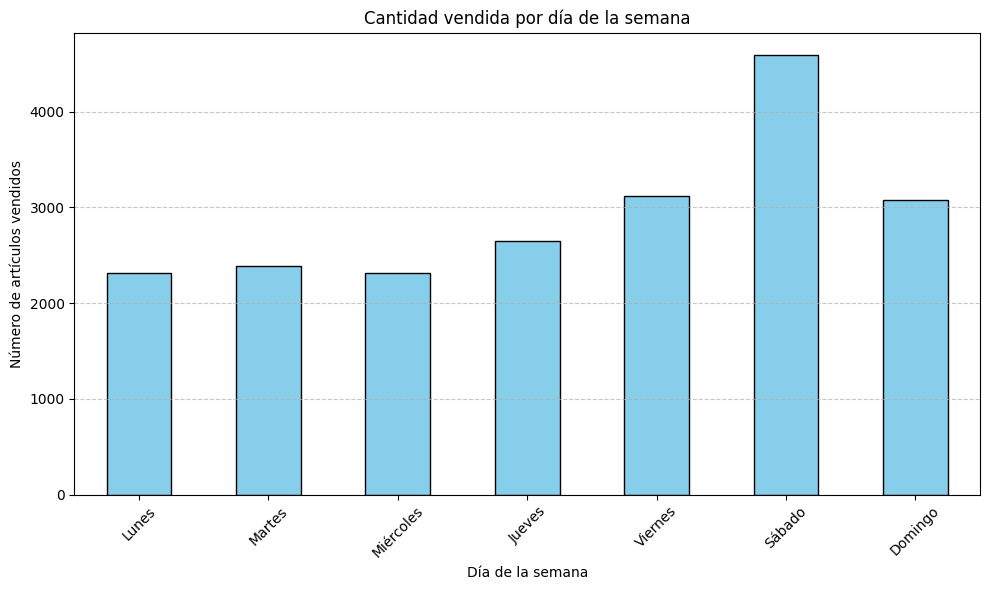

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Conversión de la columna 'Date' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Mapeo del día de la semana (0 = Lunes, 6 = Domingo)
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df['DiaSemana'] = df['Date'].dt.dayofweek.apply(lambda x: dias_semana[x])

# Conteo de artículos vendidos por día de la semana
ventas_por_dia = df['DiaSemana'].value_counts().reindex(dias_semana)

# Creación del gráfico de barras
plt.figure(figsize=(10, 6))
ventas_por_dia.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad vendida por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de artículos vendidos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

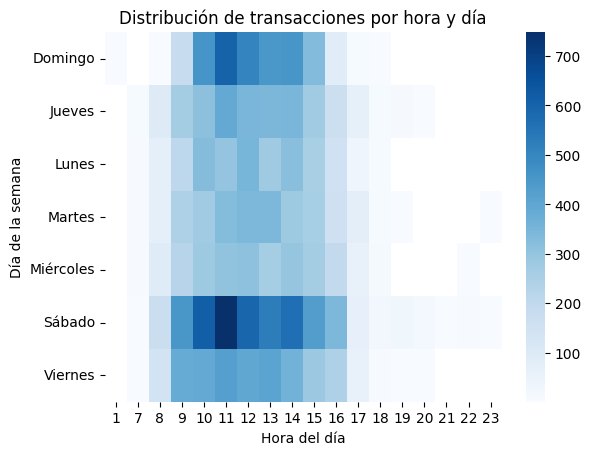

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Análisis de la hora con formato especificado
df['Hora'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Creación del mapa de calor
heatmap_data = df.groupby(['DiaSemana', 'Hora']).size().unstack()
sns.heatmap(heatmap_data, cmap='Blues')
plt.title("Distribución de transacciones por hora y día")
plt.xlabel("Hora del día")
plt.ylabel("Día de la semana")
plt.show()

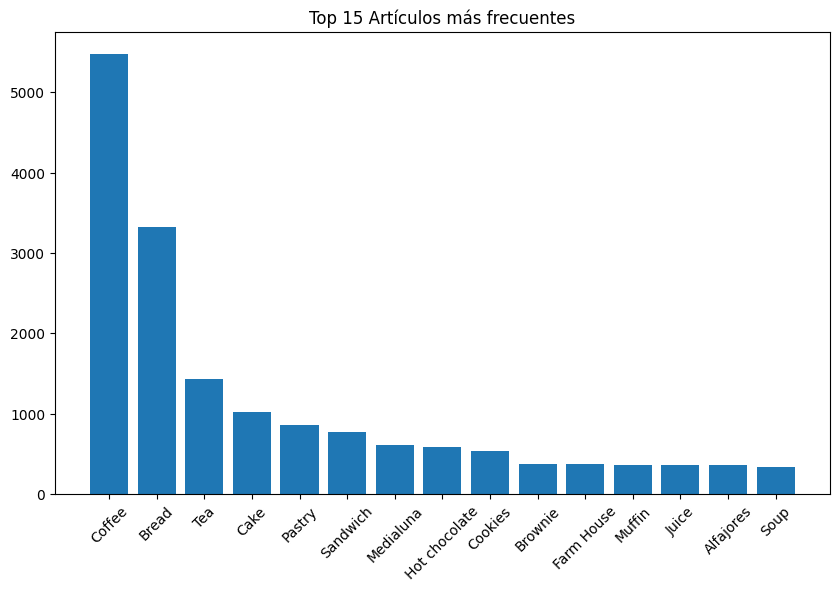

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Aplanar la lista de transacciones
flat_items = [item for sublist in transacciones for item in sublist]

# Crear un DataFrame a partir de la lista de artículos
items_series = pd.Series(flat_items)

# Contar la frecuencia de cada artículo usando value_counts
items_df = items_series.value_counts().reset_index()
items_df.columns = ['Item', 'Frecuencia']

# Ordenar el DataFrame por frecuencia (ya está ordenado por defecto)
items_df = items_df.sort_values(by='Frecuencia', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(items_df['Item'][:15], items_df['Frecuencia'][:15])
plt.xticks(rotation=45)
plt.title("Top 15 Artículos más frecuentes")
plt.show()

En esta parte del código, empezamos a llegar al meollo del análisis. En primer lugar, creo una lista única de elementos sin repeticiones (sorted).

A continuación, se crean dos diccionarios que se complementan y me permiten asociar a cada artículo un índice numérico único.

A continuación, imprimo el total de artículos únicos (92) y un ejemplo de cómo se construyeron los diccionarios. A continuación sigue una parte clave para utilizar los datos. Creo la matriz cliente x artículo (One-Hot Encoding) que es una matriz de ceros con dimensiones iguales al número de transacciones multiplicado por el número de artículos únicos. Cada fila representa una transacción y cada columna representa un artículo.

Para cada transacción (articulos_cliente), y para cada artículo de esa transacción, establece el valor correspondiente en la matriz del conjunto de datos en 1, utilizando el índice del artículo obtenido de articulos_codigo.

In [ ]:
import numpy as np

# Lista única de artículos (sin repeticiones)
lista_articulos = sorted(list({item for trans in transacciones for item in trans}))

# Creamos los diccionarios de codificación
items_code = {name: idx for idx, name in enumerate(lista_articulos)}
code_items = {idx: name for name, idx in items_code.items()}

print(f"Total de artículos únicos: {len(lista_articulos)}")
print("Ejemplo de items_code:", dict(list(items_code.items())[:5]))

# Construcción de la matriz clientes x artículos (One-Hot Encoding)
dataset = np.zeros((len(transacciones), len(lista_articulos)), dtype=int)

for cl_idx, articulos_cliente in enumerate(transacciones):
    for articulo in articulos_cliente:
        if articulo in items_code:  # seguridad
            dataset[cl_idx, items_code[articulo]] = 1

Total de artículos únicos: 92
Ejemplo de items_code: {'Alfajores': 0, 'Argentina Night': 1, 'Art Tray': 2, 'Bacon': 3, 'Baguette': 4}


A continuación paso a definir las tres métricas principales en el análisis de reglas de asociación. El soporte es la métrica más básica y representa simplemente la frecuencia con la que un conjunto de elementos aparece en las transacciones. Así, si tenemos N transacciones totales y n transacciones que contienen el conjunto de elementos I, el soporte es:



Soporte(I) = n/N



La confianza mide hasta qué punto podemos confiar en una regla de asociación. Para una regla A → B (donde A es el antecedente y B el consecuente), la confianza nos dice con qué frecuencia aparece B en las transacciones que contienen A. En otras palabras, es la probabilidad condicional de encontrar B dado que tenemos A:



Confidence(A → B) = Support(A ∪ B) / Support(A)



Lift es una métrica muy interesante porque nos dice con cuánta más frecuencia A y B aparecen juntos de lo que esperaríamos si fueran estadísticamente independientes. Un Lift superior a 1 indica que existe una correlación positiva entre A y B, mientras que un valor inferior a 1 sugiere una correlación negativa. Si el Lift es exactamente 1, significa que A y B son independientes. La fórmula Lift es:



Lift(A → B) = Soporte(A ∪ B) / (Soporte(A) × Soporte(B))

In [ ]:
def Support(X, IS):
    N = len(X)
    subset = set(range(N))
    for item in IS:
        subset &= set(np.where(X[:, item] == 1)[0])
    return len(subset) / N

def Confidence(X, antecedent, consequent):
    subset = set(range(len(X)))
    for item in antecedent:
        subset &= set(np.where(X[:, item] == 1)[0])
    occAntecedent = len(subset)
    for item in consequent:
        subset &= set(np.where(X[:, item] == 1)[0])
    occRule = len(subset)
    return occRule / occAntecedent if occAntecedent > 0 else 0

def Lift(X, antecedent, consequent):
    support_antecedent = Support(X, antecedent)
    support_consequent = Support(X, consequent)
    support_both = Support(X, antecedent + consequent)
    return support_both / (support_antecedent * support_consequent) if support_antecedent * support_consequent > 0 else 0


#2
---
#Selección del primer algoritmo
---

Aquí terminamos el preprocesamiento y seleccionamos el primer algoritmo de extracción de reglas de asociación. El algoritmo APriori suele ser el más famoso y utilizado en estos casos, funciona iterativamente empezando con itemsets de tamaño 1 y construyendo progresivamente itemsets mayores. Su eficacia se basa en el principio de que si un conjunto de elementos no es frecuente, ninguno de sus superconjuntos puede serlo.

Más concretamente, el algoritmo crea inicialmente un diccionario « supports » para almacenar el soporte de los itemsets y identifica todos los items individuales del conjunto de datos.



Para cada elemento individual, se calcula su soporte y, si es mayor o igual que el soporte_mínimo especificado, el elemento se conserva en el diccionario de soportes con su soporte asociado.


En este punto, los itemsets que superan el umbral min_support se almacenan en itemsets.

Sin embargo, sería reductor que el algoritmo se detuviera a calcular la proporción de itemsets únicos, también debemos contemplar el caso de posibles combinaciones de dos o más itemsets con otros. Por lo tanto, el algoritmo entra entonces en un ciclo que genera itemsets de tamaño creciente que van desde 2 hasta el número total de elementos.



Primero utiliza «combinations» para generar todas las combinaciones posibles de los itemsets frecuentes encontrados en el paso anterior y, para cada combinación, crea un nuevo itemset «aplanado» (flat_itemset) eliminando los duplicados y ordenando los elementos.

A continuación, puede calcular el soporte del nuevo conjunto de ítems y, si supera el umbral mínimo, el conjunto de ítems se añade al diccionario de soporte.
Se permanece en este bucle hasta que no se pueden generar más conjuntos de ítems nuevos o hasta que no se encuentran más conjuntos de ítems que cumplan el soporte mínimo.

El resultado final del algoritmo es una lista de diccionarios (support_levels), donde cada diccionario contiene itemsets frecuentes de un cierto tamaño y sus soportes asociados.

In [ ]:
from itertools import combinations, chain

def APriori(X, min_support):
    supports = {}
    items = set(np.arange(X.shape[1]))

    for item in items:
        s = Support(X, [item])
        if s >= min_support:
            supports[(item,)] = s

    itemsets = list(supports.keys())
    support_levels = [supports]

    for itemset_len in range(2, len(items)):
        supports = {}
        for itemset in combinations(itemsets, itemset_len):
            flat_itemset = tuple(sorted(set(chain.from_iterable(itemset))))
            if len(flat_itemset) != itemset_len:
                continue
            s = Support(X, list(flat_itemset))
            if s >= min_support:
                supports[flat_itemset] = s
        if not supports:
            break
        support_levels.append(supports)
        itemsets = list(supports.keys())
    return support_levels


Aquí simplemente calculamos el tiempo medio de ejecución del algoritmo, que observamos que es de 211 milisegundos con una desviación estándar de 3,86 milisegundos. Los datos se obtienen tras realizar un total de 7 ejecuciones en 1 run

In [ ]:
# Medición del tiempo de ejecución
%%timeit
itemsets = APriori(dataset, min_support=0.02)

211 ms ± 3.86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


En esta parte del código vamos a extraer las reglas de asociación a partir de los itemsets frecuentes previamente encontrados por el algoritmo Apriori. Para ello inicializamos una función extract_rules que toma el parámetro
"itemsets" donde encontramos los itemsets frecuentes encontrados por el algoritmo Apriori y "min_conf" que representa la confianza mínima requerida para considerar válida una regla. En este punto, para cada itemset frecuente de tamaño k &gt; 1, el código genera dos posibles tipos de regla:



Regla tipo 1: {elemento} → {todo lo demás del conjunto de elementos}

Regla de tipo 2: {todo lo demás del conjunto de elementos} → {elemento}



A continuación, se calcula la confianza de cada regla y sólo se guardan en el diccionario assoc_rules las reglas que superan el umbral mínimo de confianza (min_conf).

El resultado final es un diccionario de reglas de asociación con sus respectivas confianzas. Estas reglas pueden interpretarse como "si un cliente compra A, entonces con confianza X también comprará B".

In [ ]:
def extract_rules(itemsets, min_conf):
  assoc_rules = {} # Reglas de asociación (key) y confianza (value)

  for k in range(1, len(itemsets)): # Pasamos por todos los niveles
    k_ary_itemsets= itemsets[k]

    # Pasamos por todos los itemsets frecuentes de tamaño k
    for itemset in k_ary_itemsets:

      for item in itemset:

        # Eliminamos el item que se testea en la regla
        X= list(itemset)
        X.remove(item)
        X = tuple(X)

        # Regla 1: item es antecedente item -> X
        support_itemset= k_ary_itemsets[itemset]
        support_item= itemsets[0][tuple([item])]
        r1_conf = support_itemset/support_item

        # Regla 2: item es consecuente X -> item
        support_X= itemsets[len(X)-1][X]
        r2_conf= support_itemset/support_X

        # Selección de reglas a insertar
        if r1_conf >= min_conf: # La regla r1 supera umbral de confianza
          assoc_rules[ tuple([tuple([item]), X]) ]= r1_conf

        if r2_conf >= min_conf: # La regla r2 supera umbral de confianza
          assoc_rules[ tuple([X, tuple([item])]) ]= r2_conf
  return assoc_rules


Si el bloque de código anterior era general y aplicable en todos los casos, ahora lo hacemos específico para nuestros datos estableciendo un soporte mínimo de 0,02, con lo que sólo consideramos los itemsets que aparecen en el 2% o más de las transacciones, y una confianza mínima de 0,3, lo que significa que sólo aceptamos reglas con una confianza del 30% o más.

Ahora ejecutamos el análisis para encontrar todos los itemsets frecuentes y generar reglas de asociación a partir de estos itemsets.



Para cada regla, volvemos a convertir los números en el nombre correspondiente, calculamos la elevación e imprimimos los datos

In [ ]:
min_support = 0.02
min_conf = 0.3

# Inicio del algoritmo
itemsets = APriori(dataset, min_support)
reglas = extract_rules(itemsets, min_conf)

# Salida de las reglas encontradas
for (antecedente, consecuente), conf in reglas.items():
    ant_names = [code_items[i] for i in antecedente]
    cons_names = [code_items[i] for i in consecuente]
    lift = Lift(dataset, list(antecedente), list(consecuente))
    print(f"{ant_names} → {cons_names} | confianza = {conf:.2f}, lift = {lift:.2f}")

['Pastry'] → ['Bread'] | confianza = 0.34, lift = 1.03
['Cake'] → ['Coffee'] | confianza = 0.53, lift = 1.10
['Cookies'] → ['Coffee'] | confianza = 0.52, lift = 1.08
['Hot chocolate'] → ['Coffee'] | confianza = 0.51, lift = 1.06
['Juice'] → ['Coffee'] | confianza = 0.53, lift = 1.11
['Medialuna'] → ['Coffee'] | confianza = 0.57, lift = 1.19
['Pastry'] → ['Coffee'] | confianza = 0.55, lift = 1.15
['Sandwich'] → ['Coffee'] | confianza = 0.53, lift = 1.11
['Tea'] → ['Coffee'] | confianza = 0.35, lift = 0.73
['Toast'] → ['Coffee'] | confianza = 0.70, lift = 1.47


#*3*
----
#Extracción de resultados y visualización
----

Una vez que tenía todas las reglas que cumplían los requisitos mínimos, ahora tocaba ir a buscar las mejores y lo hice ordenando la lista de reglas en orden descendente según la confianza y decidí crear un formato de tabla para una visualización más elegante, fácil de entender y completa.



Aquí surge en particular una regla según la cual los clientes compran tostadas y luego compran también café con una confianza de 0,704403 y un lift de 1,467453. Se trata de una regla muy muy interesante y válida que sugeriría manipular el precio del café

In [ ]:
import pandas as pd

# Después de extraer las reglas
reglas_ordenadas = sorted(reglas.items(), key=lambda x: x[1], reverse=True)

# Selecciona las primeras 10 reglas
top_10_reglas = reglas_ordenadas[:10]


# Creación de una lista de diccionarios para las reglas
reglas_lista = []
for (antecedente, consecuente), conf in top_10_reglas:
    ant_names = [code_items[i] for i in antecedente]
    cons_names = [code_items[i] for i in consecuente]
    lift = Lift(dataset, list(antecedente), list(consecuente))
    reglas_lista.append({
        'antecedents': ant_names,
        'consequents': cons_names,
        'support': Support(dataset, list(antecedente) + list(consecuente)),
        'confidence': conf,
        'lift': lift
    })

# Creación de un DataFrame
reglas_df = pd.DataFrame(reglas_lista)

# Visualización de las primeras 10 reglas en forma tabular
print("\n * Reglas más interesantes * :")
print(reglas_df.head(10))


 * Reglas más interesantes * :
       antecedents consequents   support  confidence      lift
0          [Toast]    [Coffee]  0.023746    0.704403  1.467453
1      [Medialuna]    [Coffee]  0.035302    0.569231  1.185856
2         [Pastry]    [Coffee]  0.047705    0.552147  1.150266
3          [Juice]    [Coffee]  0.020672    0.534247  1.112974
4       [Sandwich]    [Coffee]  0.038376    0.532353  1.109029
5           [Cake]    [Coffee]  0.054914    0.526958  1.097791
6        [Cookies]    [Coffee]  0.028305    0.518447  1.080059
7  [Hot chocolate]    [Coffee]  0.029683    0.507246  1.056726
8            [Tea]    [Coffee]  0.050037    0.349630  0.728369
9         [Pastry]     [Bread]  0.029259    0.338650  1.031478


Aquí proporciono una primera visualización elemental para visualizar rápidamente qué tipo de reglas tenemos. En el eje de abscisas vemos la frecuencia con la que aparece un conjunto de elementos en el conjunto de datos, que varía entre 0,02 (2%) y 0,055 (5,5%), y en el eje de ordenadas la fuerza de la regla de asociación, que varía entre 0,35 (35%) y 0,70 (70%). El lift está representado por el color de los puntos y oscila entre 0,75 y 1,35, donde los colores más claros (amarillo/verde) indican una elevación mayor (>1) y los colores más oscuros (azul/morado) indican una elevación menor (<1).

Observamos inmediatamente que la regla más interesante parece ser la que tiene una confianza en torno a 0,70 y un soporte de 0,025, que además tiene un lift relativamente alto. Como ya sabemos, esto corresponde a la correlación entre el tostado y el café. A continuación, observamos que la mayoría de las reglas tienen una confianza entre 0,50 y 0,60 y que hay una buena distribución de reglas a lo largo del eje de apoyo. Además, nuestras 10 primeras reglas tienen una elevación en torno a 1,05 (puntos verdes).

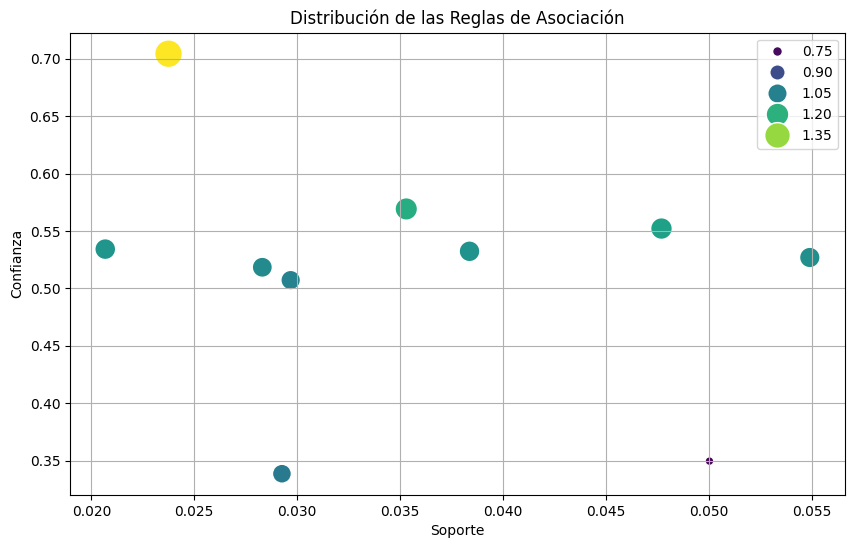

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=reglas_df, x='support', y='confidence', size='lift', hue='lift', sizes=(40, 400), palette='viridis')
plt.title('Distribución de las Reglas de Asociación')
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.legend()
plt.grid(True)
plt.show()

Aquí, aunque disponemos de pocos datos y ya tenemos clara la naturaleza y eficacia de nuestras reglas, proporciono una visualización adicional con un mapa de calor que muestra la confianza de las reglas de asociación entre los distintos productos de panadería. La intensidad del color aquí representa el valor de confianza, donde los colores más oscuros (azul marino) indican una mayor confianza y los colores más claros (amarillo) indican una menor confianza.

En el eje Y tenemos los «Antecedentes» (los productos que activan la regla) y en el eje X los «Consecuencias» (los productos que se compran en asociación).



Salta evidentemente a la vista el poder de la asociación "Tostada → Café" que emerge con una confianza del 70%, lo que significa que el 70% de las veces que alguien compra una tostada, también compra un café.

A continuación, con inmediatez observamos las otras reglas relativamente fuertes (color azul claro) con una confianza en torno al 53-57%:



Medialuna → Café (57%)

Tarta → Café (53%)

Zumo → Café (53%)

Bocadillo → Café (53%)



Las reglas más débiles en este caso (color amarillo) son:



Pastelería → Pan (34%)

Té → Café (35%)



Observamos que sólo en un caso el café no es consecuencia de otra compra, lo que demuestra lo poderoso que es el café en nuestro conjunto de datos

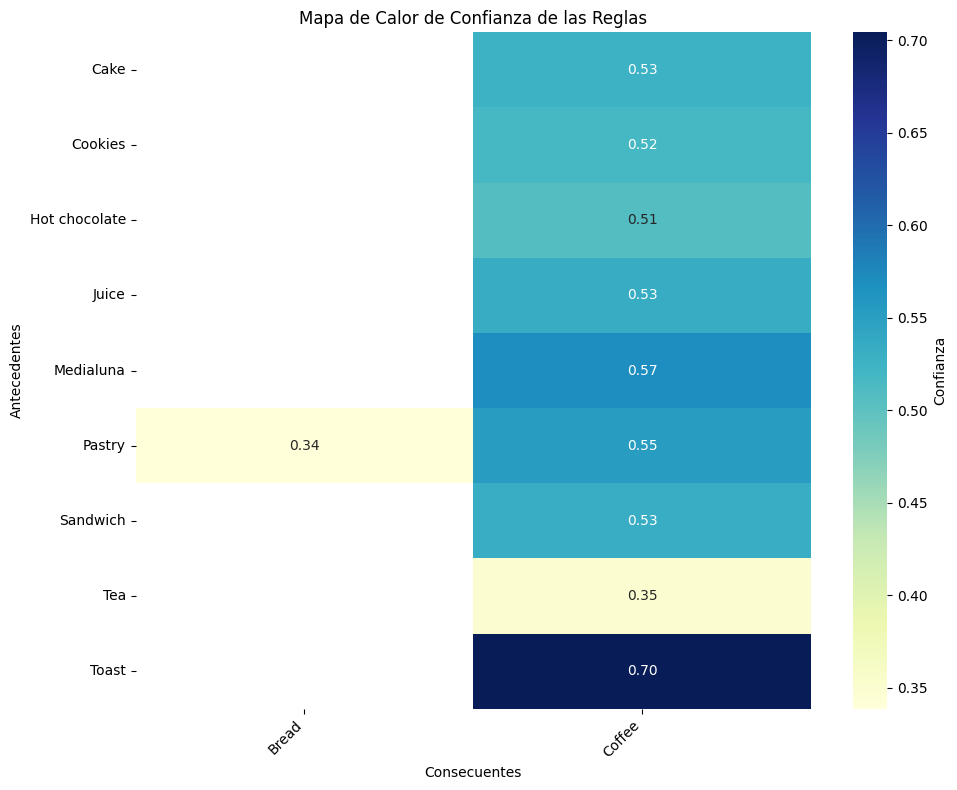

In [ ]:
# Convertir las listas en cadenas para poder usarlas en la tabla dinámica
reglas_df['antecedents_str'] = reglas_df['antecedents'].apply(lambda x: ', '.join(x))
reglas_df['consequents_str'] = reglas_df['consequents'].apply(lambda x: ', '.join(x))

# Creación de una tabla dinámica para el mapa de calor
pivot_table = reglas_df.pivot_table(index='antecedents_str', columns='consequents_str', values='confidence', aggfunc='mean')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Confianza'})
plt.title('Mapa de Calor de Confianza de las Reglas')
plt.xlabel('Consecuentes')
plt.ylabel('Antecedentes')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#FP_GROWTH


#*1*

---
#Preprocesamiento

---

Para este segundo algoritmo comienzo de nuevo a partir de los datos brutos repitiendo el mismo preprocesado seguido en la aplicación del primer algoritmo.

La única diferencia es a la hora de codificar One-hot, esto es debido a que el algoritmo fpgrowth de la librería mlxtend trabaja con un pandas DataFrame y con columnas booleanas True/False y ya no utiliza una matriz datta de 0 y 1 como con Apriori.



También he eliminado la construcción manual de las funciones de soporte y confianza

-----------------------------------------------------------------

Durante el preprocesamiento, primero empiezo a sacar información sobre mi conjunto de datos, me aseguro de que tenemos un total de 21239 productos y de que no nos faltan datos.

Posteriormente, dado que, como se indica en la explicación del proyecto, los elementos de las transacciones pueden contener valores que no se corresponden con productos vendidos. Decido eliminarlos.

En este punto hago una nueva comprobación y ahora observo que tengo un total de 20462 productos realmente vendidos.

Como cada compra puede contener varios productos, me pregunto el número de transiciones totales para averiguar que son un total de 9433. Esto me ayudará a encontrar las tendencias de los productos que más a menudo se compran juntos, ya que ahora he agrupado las transiciones. Para ello utilizo el método .groupby de pandas.



Como quiero tener una imagen completa de mis datos, construyo visualizaciones que me permiten descubrir inmediatamente que la mayoría de las ventas se realizaron los sábados y, sobre todo, por la mañana, entre las 10:30 y las 11:30.



Por último, para tener una idea de lo que puedo esperar de mis siguientes pasos de análisis, decido contar el número de productos más comprados, para entender si hay algún producto, entre los 20462, que se compre especialmente. Lo hago simplemente con dos bucles for anidados que iteran sobre las transiciones y los ítems. Al hacerlo, me doy cuenta de que el café es un artículo que se ha comprado mucho, con un total de casi 5500 registros solamente. Este dato es muy importante, de hecho ahora puedo esperar que las principales reglas de asociación incluyan el café

In [16]:
import pandas as pd

URL= "https://www.dropbox.com/scl/fi/ntzlc1hmdjfj0tk74m605/AssociationRules.csv?rlkey=4pf4fvdzcqxq2dc6rtbwfqd73&st=ma0tu437&dl=1"
df= pd.read_csv(URL)
df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [17]:
# Eliminación de valores no informativos
df = df.drop(df[df['Item'] == 'NONE'].index)
df = df.drop(df[df['Item'] == 'Adjustment'].index)
df = df.drop(df[df['Item'] == 'Afternoon with the baker'].index)

df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20462 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20462 non-null  object
 1   Time         20462 non-null  object
 2   Transaction  20462 non-null  int64 
 3   Item         20462 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [19]:
transacciones = df.groupby('Transaction')['Item'].apply(list).tolist()

print('Hay {} transacciones (compras de los clientes)'.format(len(transacciones)))

Hay 9433 transacciones (compras de los clientes)


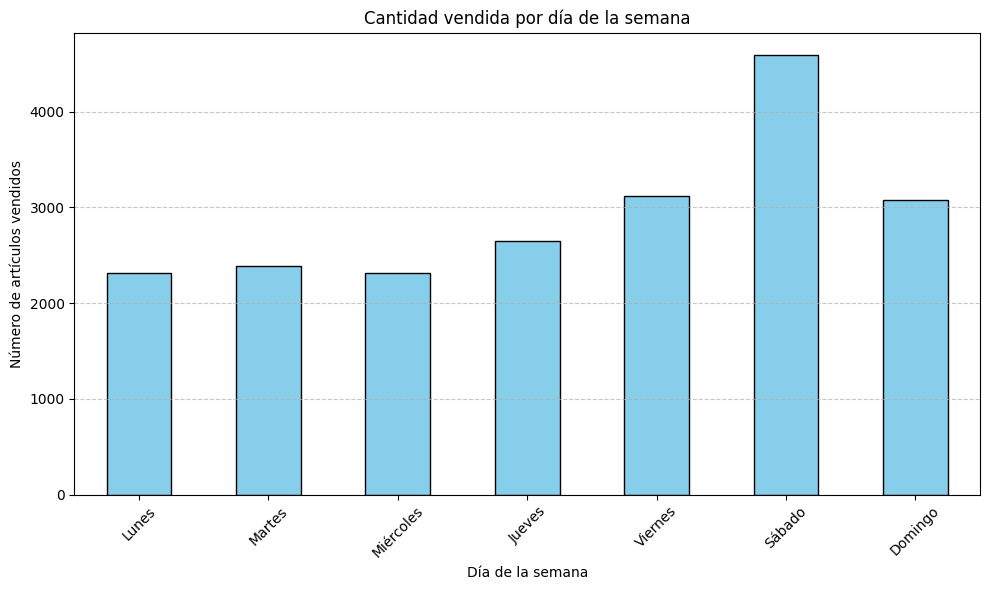

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Conversión de la columna 'Date' a formato datetime
df['Date'] = pd.to_datetime(df['Date'])

# Mapeo del día de la semana (0 = Lunes, 6 = Domingo)
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
df['DiaSemana'] = df['Date'].dt.dayofweek.apply(lambda x: dias_semana[x])

# Conteo de artículos vendidos por día de la semana
ventas_por_dia = df['DiaSemana'].value_counts().reindex(dias_semana)

# Creación del gráfico de barras
plt.figure(figsize=(10, 6))
ventas_por_dia.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cantidad vendida por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de artículos vendidos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

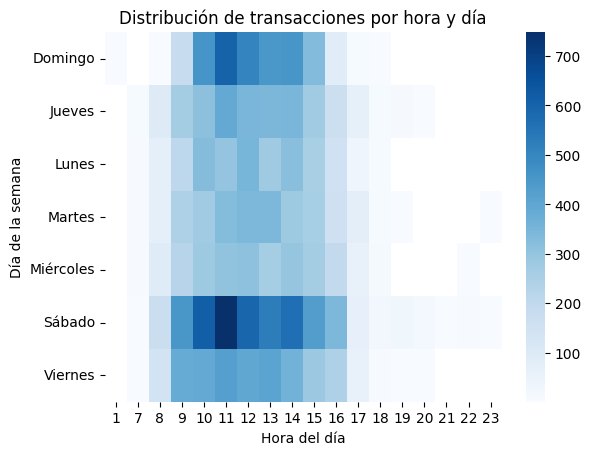

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Análisis de la hora con formato especificado
df['Hora'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Creación del mapa de calor
heatmap_data = df.groupby(['DiaSemana', 'Hora']).size().unstack()
sns.heatmap(heatmap_data, cmap='Blues')
plt.title("Distribución de transacciones por hora y día")
plt.xlabel("Hora del día")
plt.ylabel("Día de la semana")
plt.show()

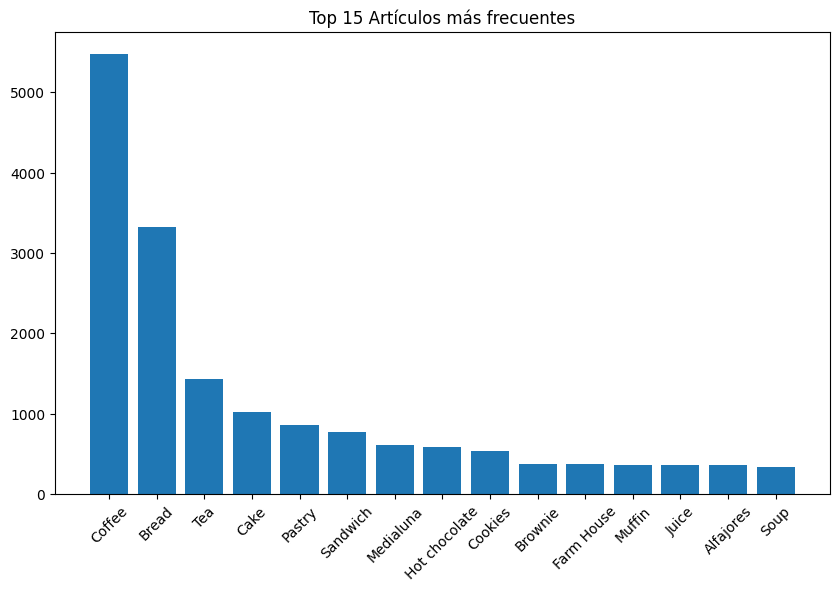

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Aplanar la lista de transacciones
flat_items = [item for sublist in transacciones for item in sublist]

# Crear un DataFrame a partir de la lista de artículos
items_series = pd.Series(flat_items)

# Contar la frecuencia de cada artículo usando value_counts
items_df = items_series.value_counts().reset_index()
items_df.columns = ['Item', 'Frecuencia']

# Ordenar el DataFrame por frecuencia (ya está ordenado por defecto)
items_df = items_df.sort_values(by='Frecuencia', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(items_df['Item'][:15], items_df['Frecuencia'][:15])
plt.xticks(rotation=45)
plt.title("Top 15 Artículos más frecuentes")
plt.show()

como se anticipó, esta es la fase de preparación de datos para fp_growth, aquí las transacciones se convierten en una matriz binaria (Verdadero/Falso).

La idea teórica de la creación de la matriz sigue siendo la utilizada durante apriori

In [23]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transacciones).transform(transacciones)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

#2
---
#Selección del segundo algoritmo
---


El segundo algoritmo utilizado es fp_growth, en el que se crea un árbol FP, que es una estructura de datos que representa las transacciones del conjunto de datos, donde cada nodo del árbol representa un artículo y los caminos del árbol representan las transacciones del conjunto de datos.



Para construir este árbol, primero se calculan las frecuencias de los artículos y se seleccionan los más frecuentes, es decir, los que superan un umbral mínimo de apoyo. A continuación, se colocan los elementos más frecuentes en la parte superior y se construye el árbol FP.



Una vez construido el FP-Tree, el algoritmo pasa a la etapa de extracción de patrones frecuentes, que consiste en buscar en el árbol todas las combinaciones de elementos que aparecen juntas de forma recurrente. Sin embargo, a diferencia de APriori, en el que se analizaban todas las combinaciones posibles de elementos, FP-Growth utiliza un método denominado «divide y vencerás», que consiste en tomar subconjuntos del árbol y explorarlos por separado para encontrar las combinaciones de elementos más frecuentes, reduciendo así el trabajo necesario para analizar todo el conjunto de datos.

El resultado final son los «patrones frecuentes», es decir, las combinaciones de elementos que aparecen juntas con más frecuencia.



En mi caso, me limité a un soporte muy muy bajo de 0,01, que devuelve los elementos que aparecen en al menos el 1% de las transacciones.

In [28]:
itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)
print("Conjuntos de items frecuentes encontrados:")
print(itemsets)

Conjuntos de items frecuentes encontrados:
     support                  itemsets
0   0.328315                   (Bread)
1   0.029153            (Scandinavian)
2   0.058518           (Hot chocolate)
3   0.054596                 (Cookies)
4   0.015054                     (Jam)
..       ...                       ...
56  0.019718         (Coffee, Brownie)
57  0.010813          (Bread, Brownie)
58  0.023746           (Coffee, Toast)
59  0.018128           (Scone, Coffee)
60  0.010919  (Spanish Brunch, Coffee)

[61 rows x 2 columns]


Este tiempo indica que el algoritmo FP-Growth tardó una media de 1,17 segundos en ejecutarse en df_encoded, con una desviación estándar de 367 milisegundos. Esto se basa en 7 ejecuciones del código, cada una ejecutada una vez.

In [29]:
%%timeit
itemsets = fpgrowth(df_encoded, min_support=0.01)

923 ms ± 51.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


En esta parte del código, generamos las reglas de asociación especificando que las reglas deben evaluarse en función de la confianza y que consideramos aquellas que tienen una confianza mínima del 30%. A continuación, se clasifican en orden descendente y se imprimen

In [30]:
# --- Reglas de asociación ordenadas por confianza ---
reglas = association_rules(itemsets, metric="confidence", min_threshold=0.3)
reglas = reglas.sort_values(by="confidence", ascending=False)

print("\nReglas de asociación ordenadas por confianza:")
print(reglas[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Reglas de asociación ordenadas por confianza:
         antecedents consequents   support  confidence      lift
16           (Toast)    (Coffee)  0.023746    0.704403  1.467453
18  (Spanish Brunch)    (Coffee)  0.010919    0.598837  1.247533
6        (Medialuna)    (Coffee)  0.035302    0.569231  1.185856
3           (Pastry)    (Coffee)  0.047705    0.552147  1.150266
14       (Alfajores)    (Coffee)  0.019718    0.540698  1.126414
8            (Juice)    (Coffee)  0.020672    0.534247  1.112974
13        (Sandwich)    (Coffee)  0.038376    0.532353  1.109029
10            (Cake)    (Coffee)  0.054914    0.526958  1.097791
17           (Scone)    (Coffee)  0.018128    0.522936  1.089411
1          (Cookies)    (Coffee)  0.028305    0.518447  1.080059
0    (Hot chocolate)    (Coffee)  0.029683    0.507246  1.056726
15         (Brownie)    (Coffee)  0.019718    0.490765  1.022391
2           (Muffin)    (Coffee)  0.018870    0.489011  1.018737
9             (Soup)    (Coffee)  0.015902 

En esta parte del código, voy a crear una visualización de las reglas de asociación centrándome en la «elevación», que recordemos es una métrica de la frecuencia con la que los elementos A y B aparecen juntos, más de lo que cabría esperar si fueran estadísticamente independientes. Una elevación > 1 indica una correlación positiva.

En este bloque de código, por tanto, ordeno las reglas de asociación por el valor de lift en orden descendente y tras seleccionar las 12 mejores (12 porque quería incluir la primera asociación en la que no se incluye el café) genero un gráfico de barras horizontal donde el eje y muestra las reglas (antecedente → consecuente) y el eje x muestra los valores de lift





Observamos que en las 12 primeras posiciones encontramos las mismas reglas encontradas por orden de confianza excepto en el duodécimo caso donde se encuentra la regla "pastry"  → "bread" y no la regla "brownie → café" que se muestra en el siguiente gráfico con la confianza con un lift ligeramente superior a 1 pero positivo de todas forma.

La relación entre la tostada y el café sigue siendo muy fuerte, con su subida del 1,5. Los demás valores se mantienen entre 1 y 1,3 pero siguen siendo buenas reglas

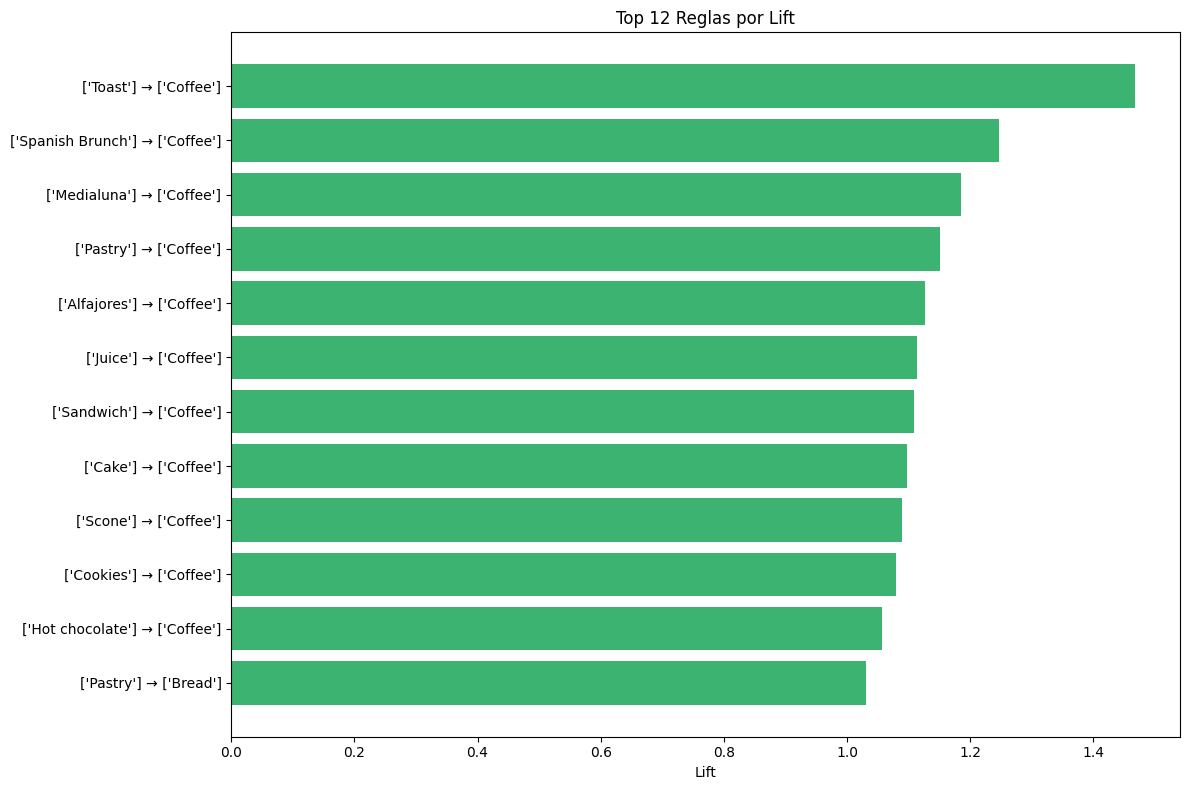

In [36]:
import matplotlib.pyplot as plt

# Ordenamiento por lift en orden descendente
reglas_lift = reglas.sort_values(by="lift", ascending=False)

# Selección de las 12 reglas con lift más alto
top_rules = reglas_lift.head(12)

# Etiquetas y valores de lift
labels = [f"{list(ant)} → {list(cons)}" for ant, cons in zip(top_rules['antecedents'], top_rules['consequents'])]
lift_values = top_rules['lift']

# Gráfico de barras horizontales
plt.figure(figsize=(12, 8))
plt.barh(labels[::-1], lift_values[::-1], color='mediumseagreen')
plt.xlabel('Lift')
plt.title('Top 12 Reglas por Lift')
plt.tight_layout()
plt.show()

Aquí creo una visualización en la que podemos ver inmediatamente las 12 reglas de asociación con mayor confianza

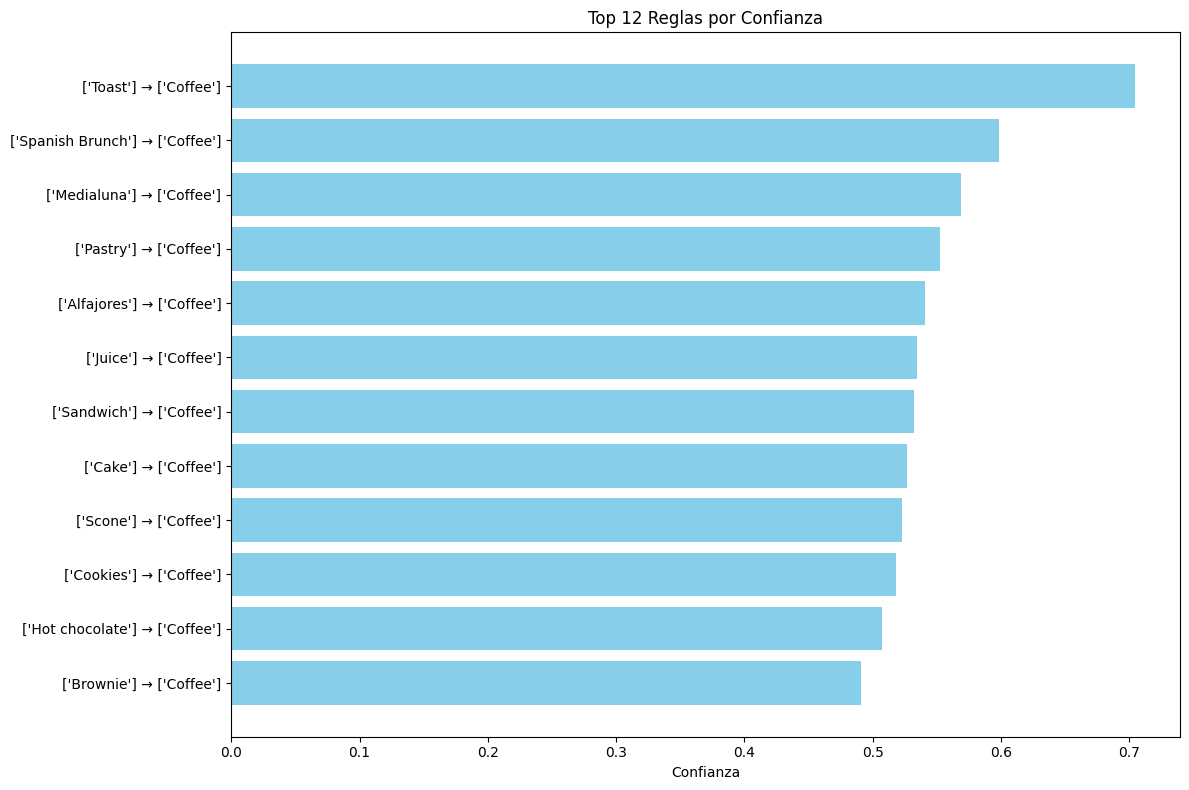

In [40]:
import matplotlib.pyplot as plt

# Preparar datos para el gráfico
top_rules = reglas.head(12)
labels = [f"{list(ant)} → {list(cons)}" for ant, cons in zip(top_rules['antecedents'], top_rules['consequents'])]
conf_values = top_rules['confidence']

# Gráfico
plt.figure(figsize=(12, 8))
plt.barh(labels[::-1], conf_values[::-1], color='skyblue')
plt.xlabel('Confianza')
plt.title('Top 12 Reglas por Confianza')
plt.tight_layout()
plt.show()

Aquí se puede ver un mapa de calor con el ratio de confianza y lift que resume y confirma lo dicho hasta ahora. Muy fuerte la primera regla con un empeoramiento en la segunda y todas las demás muy parecidas en valores de confianza y lift

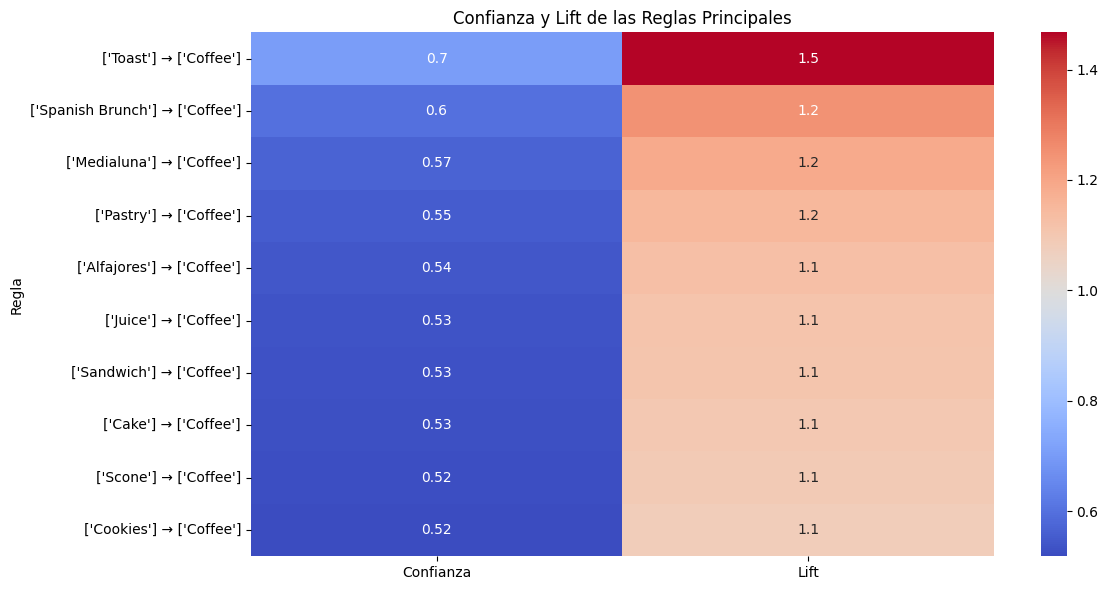

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creación del DataFrame para el gráfico de mapa de calor
df_viz = pd.DataFrame([
    {
        'Regla': f"{list(ant)} → {list(cons)}",
        'Confianza': conf,
        'Lift': lift
    }
    for ant, cons, conf, lift in zip(top_rules['antecedents'], top_rules['consequents'], top_rules['confidence'], top_rules['lift'])
])

# Gráfico de mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(df_viz[['Confianza', 'Lift']].set_index(df_viz['Regla']), annot=True, cmap='coolwarm')
plt.title('Confianza y Lift de las Reglas Principales')
plt.ylabel('Regla')
plt.tight_layout()
plt.show()

A continuación presento un mapa de calor que representa la confianza de las reglas de asociación entre distintos productos, en el que el eje y representa los antecedentes y el eje x horizontal los consecuentes. Las celdas más oscuras indican una mayor confianza, lo que sugiere una relación más fuerte entre los productos y, de nuevo, vemos la hegemonía de la asociación entre la tostada y el café.
También observamos el único caso, a pesar de la muy baja confianza, en el que tenemos la relación que no incluye el café, a saber, la existente entre Pastry y Bread

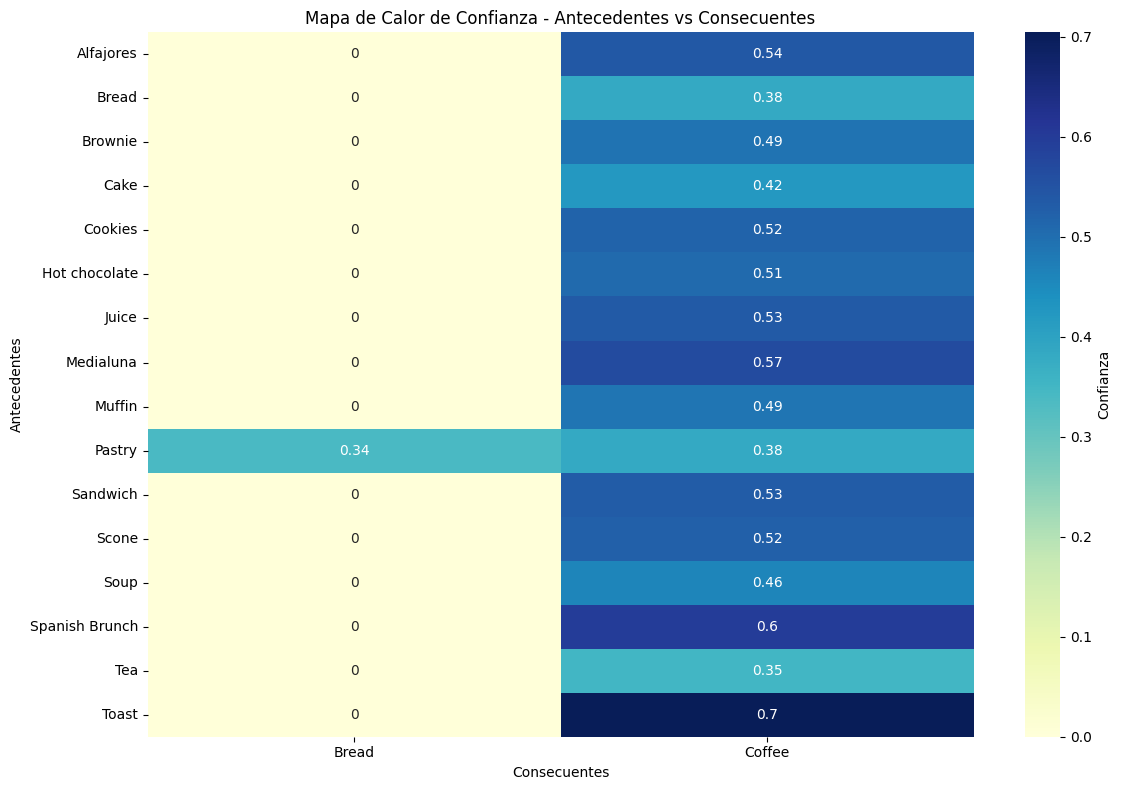

In [39]:
from itertools import product

# Extraer todos los valores únicos de antecedentes y consecuentes
antecedentes = set()
consecuentes = set()

for idx, fila in reglas.iterrows():
    antecedentes.update(fila['antecedents'])
    consecuentes.update(fila['consequents'])

# Ordenar para consistencia visual
antecedentes = sorted(antecedentes)
consecuentes = sorted(consecuentes)

# Crear DataFrame vacío
matriz_reglas = pd.DataFrame(0.0, index=antecedentes, columns=consecuentes)

# Rellenar la matriz con los valores de confianza
for idx, fila in reglas.iterrows():
    for a, c in product(fila['antecedents'], fila['consequents']):
        matriz_reglas.loc[a, c] = fila['confidence']

# Visualización del mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_reglas, annot=True, cmap="YlGnBu",
            cbar_kws={'label': 'Confianza'})
plt.title("Mapa de Calor de Confianza - Antecedentes vs Consecuentes")
plt.xlabel("Consecuentes")
plt.ylabel("Antecedentes")
plt.tight_layout()
plt.show()

Como visualización final, aunque no es necesaria puesto que la tendencia de nuestras reglas de asociación ya está muy clara, proporciono un gráfico en el que podemos visualizar una vez más cómo el café está en el centro de todas las reglas mientras que sólo en un caso tenemos un nodo adicional, que es el que hay entre "pastelería" y "pan"

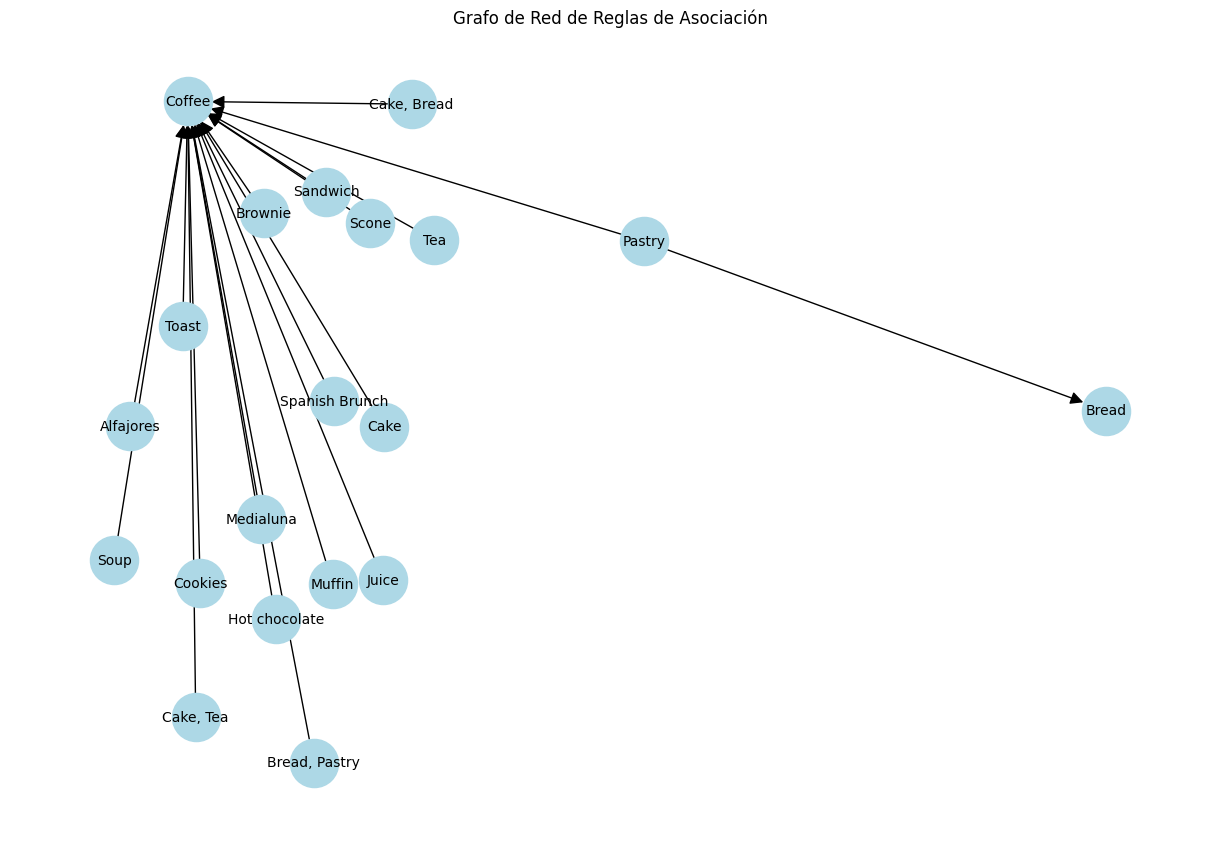

In [ ]:
import networkx as nx

G = nx.DiGraph()
for idx, row in reglas.iterrows():
    ant = ', '.join(list(row['antecedents']))
    cons = ', '.join(list(row['consequents']))
    G.add_edge(ant, cons, weight=row['lift'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=1200, arrowsize=19, font_size=10)
plt.title('Grafo de Red de Reglas de Asociación')
plt.show()